# Robust Automated Transformer-based Cardiac Health Evaluation Tool -> RATCHET

In [7]:
import read_data as rd
import reprocessing as re_prcs
import numpy as np
import matplotlib.pyplot as plt
og_signals = rd.read_record("/home/phuc/university_of_science/ECG_Transformer/ECG-TRANSFORMER/data/mit-bih-arrhythmia-database-1.0.0/103")
annotation = rd.read_annotate("/home/phuc/university_of_science/ECG_Transformer/ECG-TRANSFORMER/data/mit-bih-arrhythmia-database-1.0.0/103")
#print(signals, annotation)

### We will now seperate normal heart beat from abnormal ones

In [2]:

annote_normal_beats = re_prcs.beat_annotations(annotation)
annote_fusion = re_prcs.normal_beat_annotations(annotation)
print(annote_normal_beats)
print(annote_fusion)

(array([   265,    575,    876, ..., 649195, 649534, 649875]), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1'))
(array([   265,    575,    876, ..., 649195, 649534, 649875]), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1'))


In [3]:
signals = np.array(og_signals).flatten() #flattening original signal to one-dimensional array
print(signals)

[-0.375 -0.375 -0.375 ... -0.235 -0.245  0.   ]


[-0.21615646 -0.21615594 -0.21615438 ... -0.15232858 -0.15881094
  0.        ]
0.9
-0.99


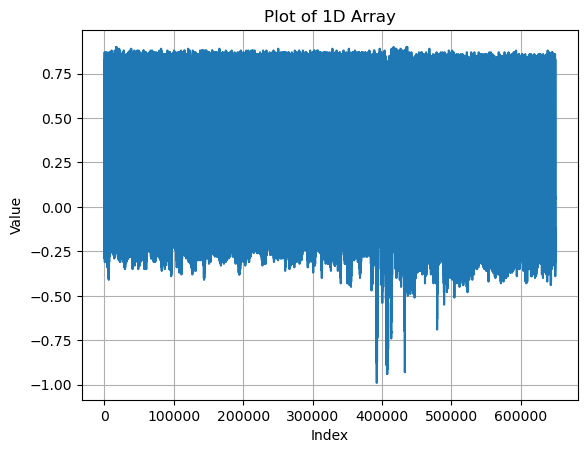

In [4]:
#normalizing signal
norm_signals = re_prcs.norm(signals, window_len=500 )

print(norm_signals)
norm_signals = re_prcs.smooth(norm_signals,11)
norm_signals = [round(num, 2) for num in norm_signals]
print(max(norm_signals))
print(min(norm_signals))
x_values = np.arange(len(norm_signals))

# Plot the array
plt.plot(x_values, norm_signals)
plt.title('Plot of 1D Array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [5]:
#splitting the data into chunks/tokens
split_idx = rd.spliting_index(chunk_size=2500,chunk_step=1,max_index=len(norm_signals), num_overlap=10,start_idx=0)
print(split_idx)

[[     0      1      2 ...   2497   2498   2499]
 [  2490   2491   2492 ...   4987   4988   4989]
 [  4980   4981   4982 ...   7477   7478   7479]
 ...
 [642420 642421 642422 ... 644917 644918 644919]
 [644910 644911 644912 ... 647407 647408 647409]
 [647400 647401 647402 ... 649897 649898 649899]]


In [6]:
#maximum bumber of token
possible_val = sorted(list(set(norm_signals)))
print(len(possible_val))

190
